In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub


In [3]:
# df = pd.read_csv("./sample_data/advertising.csv")
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashydv/advertising-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/advertising.csv")

100%|██████████| 1.83k/1.83k [00:00<00:00, 528kB/s]

Extracting files...
Path to dataset files: C:\Users\ANSH\.cache\kagglehub\datasets\ashydv\advertising-dataset\versions\1


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


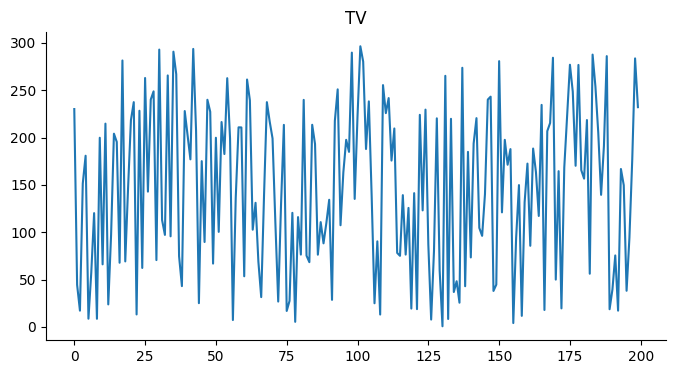

In [6]:
from matplotlib import pyplot as plt
df['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.TV

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

C:\Users\ANSH\AppData\Local\Temp\ipykernel_23996\1425247488.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(df.Sales, df.TV, s=sizes, c=colors, vmin=0, vmax=100)


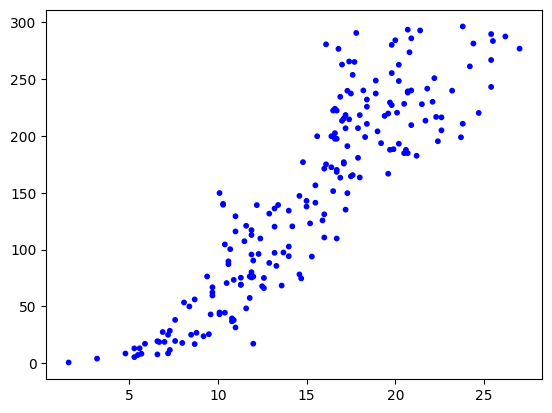

In [9]:
def scatter_plot():
  fig,ax = plt.subplots()
  # Define sizes and colors
  sizes = [10] * len(df.Sales)  # Example: set all sizes to 10
  colors = ['blue'] * len(df.Sales) # Example: set all colors to blue
  ax.scatter(df.Sales, df.TV, s=sizes, c=colors, vmin=0, vmax=100)
  plt.show()

scatter_plot()

In [10]:
y = df.Sales.values
x = df.TV.values

def generate_regression_line(x, y):
  b1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
  b0 = np.mean(y) - b1 * np.mean(x)
  return b0, b1

b0, b1 = generate_regression_line(x, y)
print(b0, b1)


6.974821488229894 0.055464770469558854


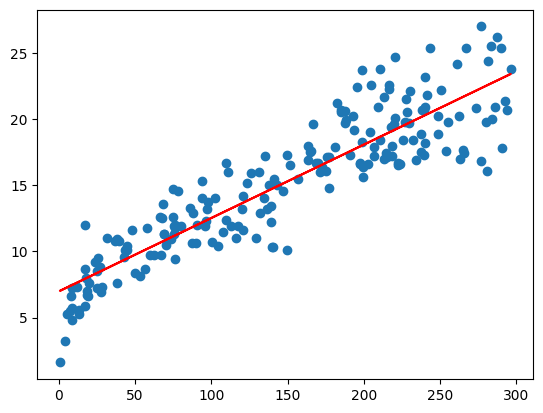

In [11]:
plt.plot(x, y, 'o')
plt.plot(x, b0 + b1 * x, 'r')
plt.show()

13.959548653554416 0.03832399510524273


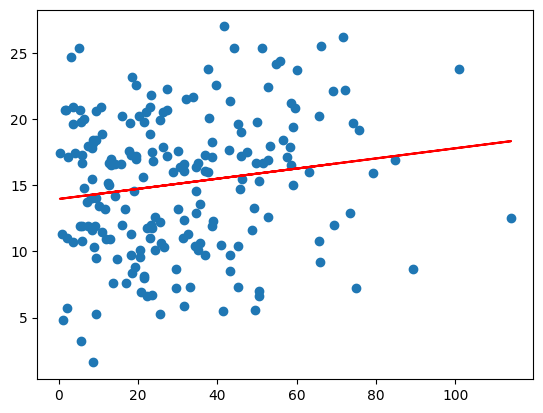

In [12]:
y = df.Sales.values
x = df.Newspaper.values

b0, b1 = generate_regression_line(x, y)
print(b0, b1)

plt.plot(x, y, 'o')
plt.plot(x, b0 + b1 * x, 'r')
plt.show()


12.235721966369233 0.12443165550338575


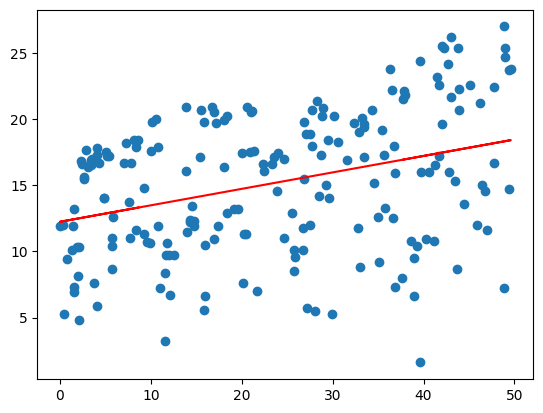

In [13]:
y = df.Sales.values
x = df.Radio.values

b0, b1 = generate_regression_line(x, y)
print(b0, b1)

plt.plot(x,y,'o')
plt.plot(x,b0 + b1*x, 'r')
plt.show()